In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.stats import gaussian_kde
from scipy import integrate
import scipy.stats as stats

import pandas as pd
import numpy as np
from scipy import integrate
import scipy.stats as stats
import pyomo.environ as pyo
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler




In [2]:
def compute_expected_value(pdf_func, a, b): 
    integrand = lambda z: z * pdf_func(z)
    expected_val, _ = integrate.quad(integrand, a, b)
    return expected_val

In [3]:
different_variances = [0.1, 0.5, 1, 2, 3]
pdf_functions = [lambda z, scale=scale: stats.norm.pdf(z, loc=0, scale=scale) for scale in different_variances]

x_low = -1
x_high = 2

for pdf_func in pdf_functions:
    exp_lowest = compute_expected_value(pdf_func, -np.inf, x_low)
    exp_highest = compute_expected_value(pdf_func, x_high, np.inf)
    print("Lowest expected value: ", exp_lowest, "     Highest expected value: ", exp_highest)



Lowest expected value:  -7.694600882705562e-24      Highest expected value:  5.529531884661522e-89
Lowest expected value:  -0.026995483256594045      Highest expected value:  6.691511288244197e-05
Lowest expected value:  -0.24197072451914342      Highest expected value:  0.05399096651318804
Lowest expected value:  -0.7041306535285992      Highest expected value:  0.48394144903828684
Lowest expected value:  -1.1321496830789797      Highest expected value:  0.9583440165670568


In [4]:
pdf_functions = [lambda z, scale=scale: stats.norm.pdf(z, loc=0, scale=scale) for scale in different_variances]
a = pdf_functions[1]
a(0.5)

0.48394144903828673

In [5]:
c = 0.5
b = lambda z: a(z+c)

In [6]:
b(0.5)

0.10798193302637613

In [7]:
a(1.0)

0.10798193302637613

In [8]:
def dynamic_expected_values(x_static, pdf_func, mode):
    x_dynamic = []
    exp_val_dynamic = []

    for x in x_static:
        if mode == 'low':
            exp_val = compute_expected_value(pdf_func, x, 0)
        elif mode == 'high':
            exp_val = compute_expected_value(pdf_func, 0, x)
        elif mode == 'lowest':
            exp_val = compute_expected_value(pdf_func, -np.inf, x)
        elif mode == 'highest':
            exp_val = compute_expected_value(pdf_func, x, np.inf)
        else:
            raise ValueError('Invalid mode')
        
        if x == x_static[0] or x == x_static[-1]:
            x_dynamic.append(x)
            exp_val_dynamic.append(exp_val)
            continue
        
        if np.abs(exp_val - exp_val_dynamic[-1]) >= 1e-8:
            x_dynamic.append(x)
            exp_val_dynamic.append(exp_val)
    return x_dynamic, exp_val_dynamic

def dynamic_expected_values_test(x_static, pdf_func, mode):
    x_dynamic = []
    exp_val_dynamic = []

    for x in x_static:
        if mode == 'low':
            exp_val = compute_expected_value(pdf_func, x, 0)
        elif mode == 'high':
            exp_val = compute_expected_value(pdf_func, 0, x)

        elif mode == 'lowest':
            pdf_func_offset = lambda z: pdf_func(z+x)
            exp_val = compute_expected_value(pdf_func_offset, -np.inf, 0)


        elif mode == 'highest':
            pdf_func_offset = lambda z: pdf_func(z+x)
            exp_val = compute_expected_value(pdf_func_offset, 0, np.inf)
        else:
            raise ValueError('Invalid mode')
        
        if x == x_static[0] or x == x_static[-1]:
            x_dynamic.append(x)
            exp_val_dynamic.append(exp_val)
            continue
        
        if np.abs(exp_val - exp_val_dynamic[-1]) >= 1e-8:
            x_dynamic.append(x)
            exp_val_dynamic.append(exp_val)
    return x_dynamic, exp_val_dynamic

In [9]:
pl_discretize_limit = 3.0


linear_points_low = np.linspace(-pl_discretize_limit, 0, 50)
linear_points_high = np.linspace(0, pl_discretize_limit, 50)
# Step 2: Apply a non-linear transformation (squaring)
nonlinear_points_low = - linear_points_low**2
nonlinear_points_high = linear_points_high**2
# Step 3: Scale the points to the desired range
scaler_low = MinMaxScaler(feature_range=(-pl_discretize_limit, 0))
scaler_low.fit(nonlinear_points_low.reshape(-1, 1))
rescaled_data_low = scaler_low.transform(nonlinear_points_low.reshape(-1, 1))
x_low_range = rescaled_data_low.flatten()

scaler_high = MinMaxScaler(feature_range=(0, pl_discretize_limit))
scaler_high.fit(nonlinear_points_high.reshape(-1, 1))
rescaled_data_high = scaler_high.transform(nonlinear_points_high.reshape(-1, 1))
x_high_range = rescaled_data_high.flatten()

In [10]:
x_low_range

array([-3.00000000e+00, -2.87880050e+00, -2.76009996e+00, -2.64389838e+00,
       -2.53019575e+00, -2.41899209e+00, -2.31028738e+00, -2.20408163e+00,
       -2.10037484e+00, -1.99916701e+00, -1.90045814e+00, -1.80424823e+00,
       -1.71053728e+00, -1.61932528e+00, -1.53061224e+00, -1.44439817e+00,
       -1.36068305e+00, -1.27946689e+00, -1.20074969e+00, -1.12453145e+00,
       -1.05081216e+00, -9.79591837e-01, -9.10870471e-01, -8.44648063e-01,
       -7.80924615e-01, -7.19700125e-01, -6.60974594e-01, -6.04748022e-01,
       -5.51020408e-01, -4.99791753e-01, -4.51062057e-01, -4.04831320e-01,
       -3.61099542e-01, -3.19866722e-01, -2.81132861e-01, -2.44897959e-01,
       -2.11162016e-01, -1.79925031e-01, -1.51187005e-01, -1.24947938e-01,
       -1.01207830e-01, -7.99666805e-02, -6.12244898e-02, -4.49812578e-02,
       -3.12369846e-02, -1.99916701e-02, -1.12453145e-02, -4.99791753e-03,
       -1.24947938e-03,  0.00000000e+00])

In [16]:
pdf_func = pdf_functions[1]
x_dynamic1, exp_val_low = dynamic_expected_values(x_low_range, pdf_func, mode='lowest')
x_dynamic2,exp_val_high = dynamic_expected_values(x_high_range, pdf_func, mode='highest')

x_dynamic3, new_exp_val_low = dynamic_expected_values_test(x_low_range, pdf_func, mode='lowest')
x_dynamic4, new_exp_val_high = dynamic_expected_values_test(x_high_range, pdf_func, mode='highest')

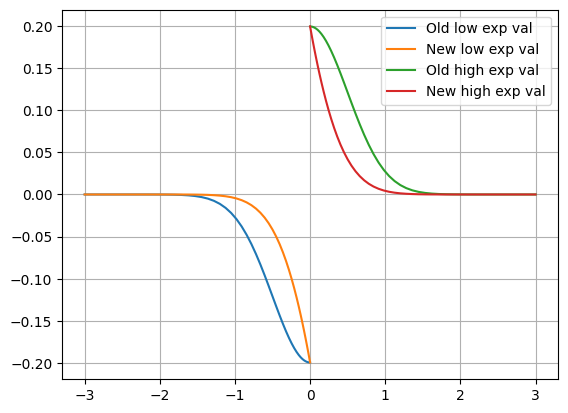

In [17]:
plt.plot(x_dynamic1, exp_val_low, label='Old low exp val')
plt.plot(x_dynamic3, new_exp_val_low, label='New low exp val')


plt.plot(x_dynamic2, exp_val_high, label='Old high exp val')
plt.plot(x_dynamic4, new_exp_val_high, label='New high exp val')
plt.grid()
plt.legend()


In [15]:
new_exp_val_low

([-3.0,
  -2.530195751770096,
  -2.4189920866305705,
  -2.3102873802582256,
  -2.2040816326530615,
  -2.100374843815077,
  -1.9991670137442732,
  -1.9004581424406493,
  -1.8042482299042064,
  -1.7105372761349438,
  -1.619325281132861,
  -1.5306122448979589,
  -1.4443981674302375,
  -1.3606830487296957,
  -1.2794668887963347,
  -1.2007496876301542,
  -1.1245314452311537,
  -1.0508121615993335,
  -0.9795918367346941,
  -0.9108704706372346,
  -0.8446480633069553,
  -0.7809246147438569,
  -0.7197001249479383,
  -0.6609745939192003,
  -0.6047480216576426,
  -0.5510204081632654,
  -0.4997917534360683,
  -0.4510620574760516,
  -0.40483132028321545,
  -0.3610995418575594,
  -0.31986672219908385,
  -0.28113286130778836,
  -0.24489795918367352,
  -0.211162015826739,
  -0.17992503123698456,
  -0.15118700541441069,
  -0.12494793835901716,
  -0.1012078300708038,
  -0.07996668054977096,
  -0.061224489795918435,
  -0.04498125780924614,
  -0.03123698458975429,
  -0.019991670137442775,
  -0.01124531445

In [13]:
new_exp_val_low

([-3.0,
  -2.530195751770096,
  -2.4189920866305705,
  -2.3102873802582256,
  -2.2040816326530615,
  -2.100374843815077,
  -1.9991670137442732,
  -1.9004581424406493,
  -1.8042482299042064,
  -1.7105372761349438,
  -1.619325281132861,
  -1.5306122448979589,
  -1.4443981674302375,
  -1.3606830487296957,
  -1.2794668887963347,
  -1.2007496876301542,
  -1.1245314452311537,
  -1.0508121615993335,
  -0.9795918367346941,
  -0.9108704706372346,
  -0.8446480633069553,
  -0.7809246147438569,
  -0.7197001249479383,
  -0.6609745939192003,
  -0.6047480216576426,
  -0.5510204081632654,
  -0.4997917534360683,
  -0.4510620574760516,
  -0.40483132028321545,
  -0.3610995418575594,
  -0.31986672219908385,
  -0.28113286130778836,
  -0.24489795918367352,
  -0.211162015826739,
  -0.17992503123698456,
  -0.15118700541441069,
  -0.12494793835901716,
  -0.1012078300708038,
  -0.07996668054977096,
  -0.061224489795918435,
  -0.04498125780924614,
  -0.03123698458975429,
  -0.019991670137442775,
  -0.01124531445

In [2]:
np.random.seed(1)
# create 24 random numbers between -5 and 5
pl = np.random.uniform(-5, 5, 24)

quantiles = np.linspace(0.01, 0.99, 99)

samples = np.random.normal(loc=0, scale=2, size=99)
samples = np.sort(samples)
delta_pl = samples
delta_pl # Uncertainties for a single timestep 


array([-4.04440243, -2.88822761, -2.79299267, -2.74623464, -2.2850364 ,
       -2.2346207 , -2.20123835, -2.18982369, -1.9074012 , -1.87153887,
       -1.77525793, -1.75571684, -1.71903188, -1.69041128, -1.50879588,
       -1.49431659, -1.3833215 , -1.3743454 , -1.36745572, -1.34249226,
       -1.34132457, -1.27746081, -1.27399129, -1.24000169, -1.00893173,
       -0.89425713, -0.79350705, -0.7505699 , -0.70449969, -0.69868544,
       -0.68770735, -0.61240803, -0.59618567, -0.53577616, -0.53243701,
       -0.44465629, -0.41778847, -0.40151614, -0.3836711 , -0.34485642,
       -0.24578045, -0.15114343, -0.0253292 ,  0.06522909,  0.08442749,
        0.08719371,  0.10161551,  0.15468014,  0.23801729,  0.2403179 ,
        0.24364254,  0.32007414,  0.33876487,  0.37031283,  0.37312278,
        0.38183097,  0.39659944,  0.46018947,  0.4688314 ,  0.57117465,
        0.60034064,  0.63031878,  0.63126989,  0.70109196,  0.75512757,
        0.80698328,  0.82010329,  0.84698871,  0.97703629,  1.00

In [3]:
# Create a continuous cdf function
cdf = list(zip(quantiles, delta_pl))
cdf_function = interp1d(delta_pl, quantiles, bounds_error=False, fill_value=(0, 1))
inverse_cdf_function = interp1d(quantiles, delta_pl, bounds_error=False, fill_value=(delta_pl[0], delta_pl[-1]))

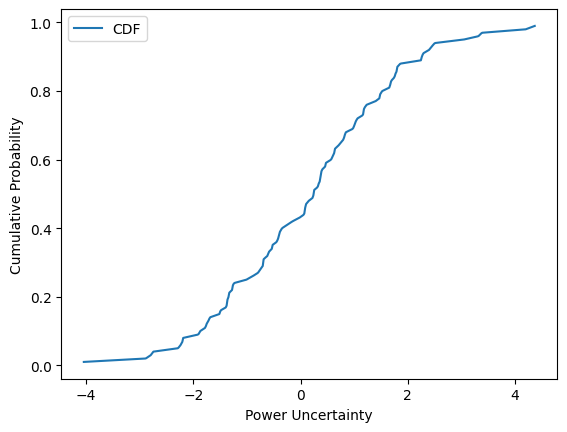

In [4]:
# Plot the cdf
x_vals = np.linspace(min(delta_pl), max(delta_pl), 500)
y_vals = cdf_function(x_vals)

plt.plot(x_vals, y_vals, label='CDF')
plt.legend()
plt.xlabel('Power Uncertainty')
plt.ylabel('Cumulative Probability')
plt.show()

Text(0, 0.5, 'Cumulative/Density Probability')

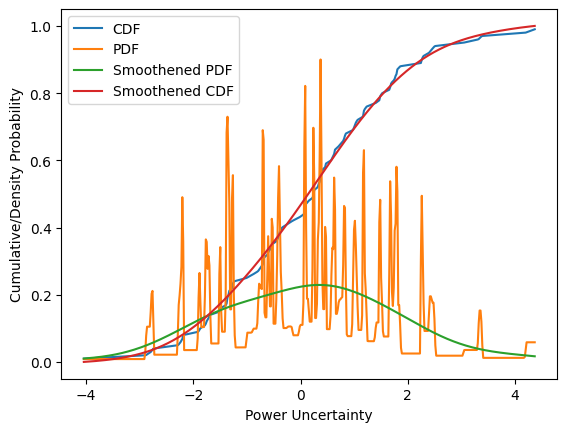

In [19]:
# Compute smoothened PDF and CDF and compare with the original CDF and PDF
plt.plot(x_vals, y_vals, label='CDF', linestyle='-')
pdf = np.gradient(y_vals, x_vals)
plt.plot(x_vals, pdf, label='PDF', linestyle='-')


kde = gaussian_kde(delta_pl, bw_method='silverman')
smoothed_pdf = kde.evaluate(x_vals)
plt.plot(x_vals, smoothed_pdf, label='Smoothened PDF')

smoothed_cdf = np.cumsum(smoothed_pdf)
smoothed_cdf /= smoothed_cdf[-1] 
plt.plot(x_vals, smoothed_cdf, label='Smoothened CDF')	

plt.legend()
plt.xlabel('Power Uncertainty')
plt.ylabel('Cumulative/Density Probability')

In [89]:
# Use the cdf/pdf functions to build new pdf functions
prob_lower = 0.2 # the lowest 20% are supposed to be shifted into the grid
prob_upper = 0.8 # the highest 20% are supposed to be shifted into the grid as well
lower_bound = inverse_cdf_function(prob_lower)
upper_bound = inverse_cdf_function(prob_upper)

closest_val_lower = x_vals[np.abs(x_vals - lower_bound).argmin()]
closest_val_upper = x_vals[np.abs(x_vals - upper_bound).argmin()]

power_index_lower = int(np.where(x_vals == closest_val_lower)[0])
power_index_upper = int(np.where(x_vals == closest_val_upper)[0])

print("Lowest power uncertainty that gets shift into the battery: ", closest_val_lower)
print("Highest power uncertainty that gets shift into the battery: ", closest_val_upper)

Lowest power uncertainty that gets shift into the battery:  -1.3460286457676602
Highest power uncertainty that gets shift into the battery:  1.5209935017302074


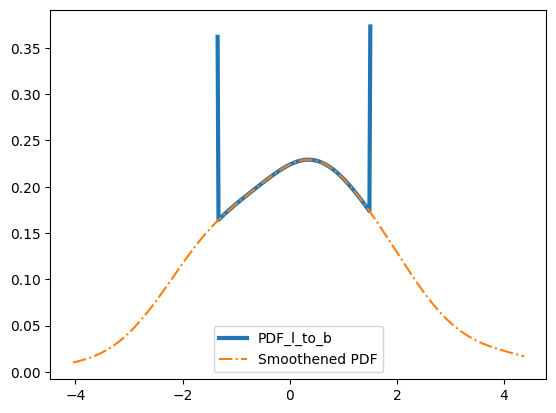

In [163]:
# pdf from load to battery
pdf_l_to_b_conti = smoothed_pdf[power_index_lower:power_index_upper]
p_lower = cdf_function(closest_val_lower)
p_higher = 1 - cdf_function(closest_val_upper)

pdf_l_to_b_disc = np.zeros_like(pdf_l_to_b_conti)
pdf_l_to_b_disc[0] = p_lower
pdf_l_to_b_disc[-1] = p_higher

pdf_l_to_b = pdf_l_to_b_conti + pdf_l_to_b_disc

#plt.plot(x_vals[power_index_lower:power_index_upper], pdf_l_to_b_conti, label='PDF_l_to_b_conti', linewidth=4, linestyle='-')
plt.plot(x_vals[power_index_lower:power_index_upper], pdf_l_to_b, label='PDF_l_to_b', linewidth=3, linestyle='-')

plt.plot(x_vals, smoothed_pdf, label='Smoothened PDF', linestyle='-.')
plt.legend()

Text(0, 0.5, 'Probability Density')

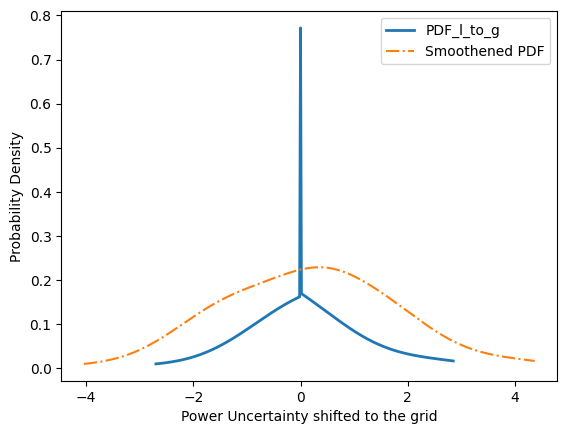

In [162]:
# pdf from load to grid
pdf_l_to_g_conti = np.concatenate((smoothed_pdf[:power_index_lower], smoothed_pdf[power_index_upper:]))

x_vals_l_to_g_lower = x_vals[:power_index_lower] - closest_val_lower # Maybe it should be power_index_lower +1 instead. Then also the continuous part needs to be changed via +1
x_vals_l_to_g_upper = x_vals[power_index_upper:] - closest_val_upper

x_vals_l_to_g = np.concatenate((x_vals_l_to_g_lower, x_vals_l_to_g_upper))

pdf_l_to_g_disc = np.zeros_like(x_vals_l_to_g)
pdf_l_to_g_disc[power_index_lower] = 1 - p_lower - p_higher

pdf_l_to_g = pdf_l_to_g_conti + pdf_l_to_g_disc
plt.plot(x_vals_l_to_g, pdf_l_to_g, label='PDF_l_to_g', linewidth=2, linestyle='-')
plt.plot(x_vals, smoothed_pdf, label='Smoothened PDF', linestyle='-.')
plt.legend()
plt.xlabel('Power Uncertainty shifted to the grid')
plt.ylabel('Probability Density')

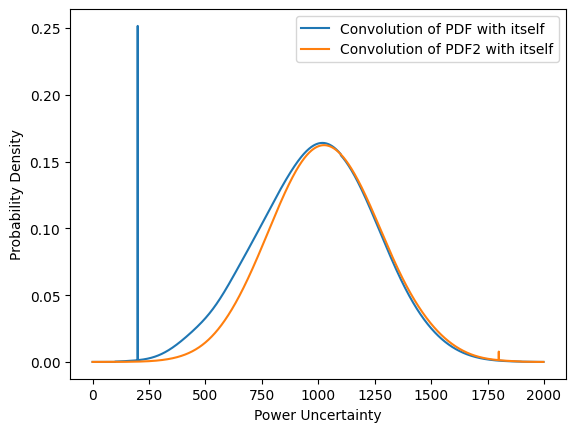

In [54]:
# calculate the convolution of the PDF with itself in a discrete manner
inc = np.linspace(-5, 5, 1000)
pdf_disc = np.zeros(len(inc))
pdf_disc[100] = 5
pdf_disc2 = np.zeros(len(inc))
pdf_disc2[900] = 0.8

pdf_cont = kde.evaluate(inc)

pdf1 = pdf_cont + pdf_disc
pdf2 = pdf_cont + pdf_disc2

# convolution
pdf_conv = np.convolve(pdf1, pdf1) * (inc[1] - inc[0])
pdf2_conv = np.convolve(pdf2, pdf2) * (inc[1] - inc[0])
plt.plot(pdf_conv, label='Convolution of PDF with itself')
plt.plot(pdf2_conv, label='Convolution of PDF2 with itself')
#plt.plot(inc, pdf1, label='PDF1')
plt.xlabel('Power Uncertainty')
plt.ylabel('Probability Density')
plt.legend()
plt.show()



In [49]:
pdf_conv[:100]

array([5.34407328e-08, 1.09252739e-07, 1.67494481e-07, 2.28225059e-07,
       2.91504194e-07, 3.57392232e-07, 4.25950128e-07, 4.97239444e-07,
       5.71322339e-07, 6.48261564e-07, 1.46054119e-05, 1.49961361e-05,
       1.53940838e-05, 1.57993098e-05, 1.62118681e-05, 1.66318117e-05,
       1.70591933e-05, 1.74940646e-05, 1.79364768e-05, 1.83864807e-05,
       9.19745027e-04, 1.93094632e-05, 1.97825408e-05, 2.02634080e-05,
       2.07521134e-05, 2.12487056e-05, 2.17532329e-05, 2.22657437e-05,
       2.27862865e-05, 2.33149098e-05, 2.38516625e-05, 2.43965938e-05,
       2.49497535e-05, 2.55111917e-05, 2.60809594e-05, 2.66591086e-05,
       2.72456918e-05, 2.78407628e-05, 2.84443768e-05, 2.90565900e-05,
       2.96774602e-05, 3.03070469e-05, 3.09454114e-05, 3.15926168e-05,
       3.22487283e-05, 3.29138134e-05, 3.35879420e-05, 3.42711867e-05,
       3.49636225e-05, 3.56653276e-05, 3.63763832e-05, 3.70968738e-05,
       3.78268873e-05, 3.85665152e-05, 3.93158530e-05, 4.00749998e-05,
      

In [6]:
import numpy as np

# Example data
x = [1, 2, 3, 4, 5]
y = [2, 5, 6, 15, 10]

# Convert lists to numpy arrays
x = np.array(x)
y = np.array(y)

# Compute the derivative
dy_dx = np.gradient(y, x)

# Print the derivative
print(dy_dx)

[ 3.  2.  5.  2. -5.]


## Tests with real data

In [7]:
# Load csv file
path = 'C:\\Users\\fh6281\\Desktop\\work\\Daten\\Dorina\\probabilistisch - 08_04_2024\\'
data = pd.read_csv(path + 'power.csv', parse_dates=["time"], index_col=('time', 'probability'))

In [8]:
data

0         1         2         3  \
time                probability                                           
2012-07-08 12:00:00 0.01        -2.373756 -1.919902 -1.852509 -1.302935   
                    0.02        -1.679234 -1.677721 -1.629181 -1.271884   
                    0.03        -1.284296 -1.359582 -1.466295 -1.054194   
                    0.04        -1.258565 -1.291086 -1.080456 -0.815726   
                    0.05        -1.229810 -1.203325 -0.998458 -0.755412   
...                                   ...       ...       ...       ...   
2013-06-28 12:00:00 0.95         0.719439  0.808074  0.844137  0.894213   
                    0.96         0.722542  0.926056  0.917460  0.902390   
                    0.97         0.862665  0.941940  0.971495  0.987662   
                    0.98         0.942222  1.074516  0.986173  1.068071   
                    0.99         0.983442  1.182554  1.083066  1.506910   

                                        4         5         6         7  \
time                probability                                           
2012-07-08 12:00:00 0.01        -1.708765 -0.854844 -0.017464  0.282331   
                    0.02        -0.864174 -0.810717  0.097223  0.361668   
                    0.03        -0.673712 -0.533125  0.267831  0.363706   
                    0.04        -0.352507 -0.316724  0.336568  0.393097   
                    0.05        -0.333187 -0.273019  0.345980  0.404784   
...                                   ...       ...       ...       ...   
2013-06-28 12:00:00 0.95         0.921517  1.415917  1.387778  1.316214   
                    0.96         1.024847  1.425650  1.432376  1.349143   
                    0.97         1.124001  1.488037  1.448135  1.374362   
                    0.98         1.338669  1.496467  1.626656  1.383550   
                    0.99         1.414526  1.661689  1.682744  1.529806   

                                        8         9  ...        32        33  \
time                probability                      ...                       
2012-07-08 12:00:00 0.01         0.273751 -0.031611  ... -0.322472  0.313869   
                    0.02         0.364169  0.275491  ...  0.241178  0.392926   
                    0.03         0.443750  0.312738  ...  0.327689  0.408193   
                    0.04         0.482550  0.430586  ...  0.409807  0.434423   
                    0.05         0.525903  0.462857  ...  0.429408  0.453066   
...                                   ...       ...  ...       ...       ...   
2013-06-28 12:00:00 0.95         1.288741  1.641332  ...  1.267882  1.584535   
                    0.96         1.371464  1.659895  ...  1.268029  1.608263   
                    0.97         1.437188  1.705805  ...  1.321058  1.672668   
                    0.98         1.508102  1.728536  ...  1.471196  1.689029   
                    0.99         1.568803  1.862158  ...  1.505774  1.725571   

                                       34        35        36        37  \
time                probability                                           
2012-07-08 12:00:00 0.01         0.181547  0.035707  0.065730 -0.010723   
                    0.02         0.284800  0.178371  0.181885  0.130969   
                    0.03         0.288104  0.182809  0.187077  0.149542   
                    0.04         0.352402  0.268636  0.252968  0.150215   
                    0.05         0.427898  0.271140  0.256628  0.203209   
...                                   ...       ...       ...       ...   
2013-06-28 12:00:00 0.95         1.781991  1.149760  0.941513  0.715784   
                    0.96         1.796559  1.215088  0.966206  0.730526   
                    0.97         2.003082  1.260665  0.973696  0.946192   
                    0.98         2.041670  1.418233  1.128654  0.999865   
                    0.99         2.082954  1.494864  1.493978  1.117162   

                                       38        39        40        41

In [9]:
data.iloc[:,0]

time                 probability
2012-07-08 12:00:00  0.01          -2.373756
                     0.02          -1.679234
                     0.03          -1.284296
                     0.04          -1.258565
                     0.05          -1.229810
                                      ...   
2013-06-28 12:00:00  0.95           0.719439
                     0.96           0.722542
                     0.97           0.862665
                     0.98           0.942222
                     0.99           0.983442
Name: 0, Length: 35244, dtype: float64

In [10]:
data.loc['2012-07-08']

0         1         2         3  \
time                probability                                           
2012-07-08 12:00:00 0.01        -2.373756 -1.919902 -1.852509 -1.302935   
                    0.02        -1.679234 -1.677721 -1.629181 -1.271884   
                    0.03        -1.284296 -1.359582 -1.466295 -1.054194   
                    0.04        -1.258565 -1.291086 -1.080456 -0.815726   
                    0.05        -1.229810 -1.203325 -0.998458 -0.755412   
...                                   ...       ...       ...       ...   
                    0.95         0.646886  0.877855  0.712580  0.777766   
                    0.96         0.748641  0.882594  0.777539  0.812740   
                    0.97         0.796526  0.936703  0.843083  0.821993   
                    0.98         0.838485  0.958453  0.852372  1.023154   
                    0.99         0.860398  1.117437  0.952914  1.298031   

                                        4         5         6         7  \
time                probability                                           
2012-07-08 12:00:00 0.01        -1.708765 -0.854844 -0.017464  0.282331   
                    0.02        -0.864174 -0.810717  0.097223  0.361668   
                    0.03        -0.673712 -0.533125  0.267831  0.363706   
                    0.04        -0.352507 -0.316724  0.336568  0.393097   
                    0.05        -0.333187 -0.273019  0.345980  0.404784   
...                                   ...       ...       ...       ...   
                    0.95         0.974732  1.311251  1.360295  1.324227   
                    0.96         1.003370  1.354582  1.478508  1.333833   
                    0.97         1.096859  1.426539  1.496767  1.354728   
                    0.98         1.133884  1.491488  1.522937  1.376826   
                    0.99         1.337439  1.537696  1.688394  1.388317   

                                        8         9  ...        32        33  \
time                probability                      ...                       
2012-07-08 12:00:00 0.01         0.273751 -0.031611  ... -0.322472  0.313869   
                    0.02         0.364169  0.275491  ...  0.241178  0.392926   
                    0.03         0.443750  0.312738  ...  0.327689  0.408193   
                    0.04         0.482550  0.430586  ...  0.409807  0.434423   
                    0.05         0.525903  0.462857  ...  0.429408  0.453066   
...                                   ...       ...  ...       ...       ...   
                    0.95         1.289837  1.597036  ...  1.242982  1.563854   
                    0.96         1.365739  1.615172  ...  1.289699  1.605288   
                    0.97         1.443361  1.693767  ...  1.356675  1.661046   
                    0.98         1.494778  1.758478  ...  1.452330  1.661358   
                    0.99         1.527030  1.769360  ...  1.525399  1.776655   

                                       34        35        36        37  \
time                probability                                           
2012-07-08 12:00:00 0.01         0.181547  0.035707  0.065730 -0.010723   
                    0.02         0.284800  0.178371  0.181885  0.130969   
                    0.03         0.288104  0.182809  0.187077  0.149542   
                    0.04         0.352402  0.268636  0.252968  0.150215   
                    0.05         0.427898  0.271140  0.256628  0.203209   
...                                   ...       ...       ...       ...   
                    0.95         1.771230  1.212810  0.896149  0.700096   
                    0.96         1.817954  1.225274  0.927898  0.749983   
                    0.97         1.891092  1.297651  0.946614  0.929610   
                    0.98         2.015614  1.357938  1.019899  0.931451   
                    0.99         2.084315  1.426558  1.483319  1.029782   

                                       38        39        40        41

<Axes: xlabel='probability'>

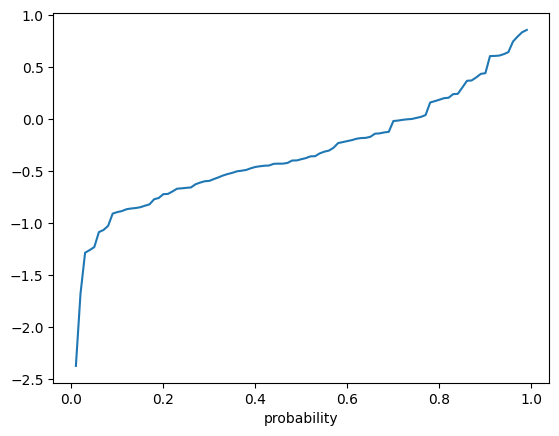

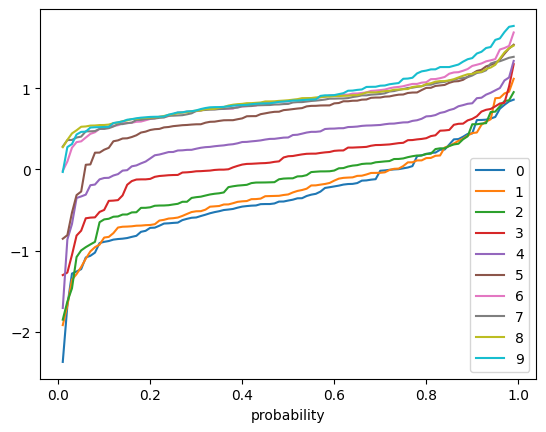

In [11]:
# visualize the columns of a single day for the different probabilities
single_day = data.loc['2012-07-08']
#drop the time index
single_day = single_day.reset_index(level=0, drop=True)
single_day.iloc[:, 0].plot()

# plot 

fig, ax = plt.subplots()
single_day.iloc[:,:10].plot(ax=ax)

Text(0, 0.5, 'Probability')

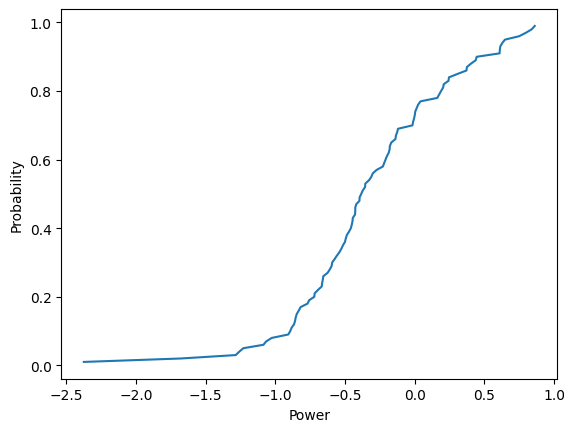

In [12]:
# extract a column of the dataframe
column = single_day.iloc[:,0]
# plot the column with the probability as the y-axis
probs = column.index
vals = column.values
plt.plot(vals, probs)
plt.xlabel('Power')
plt.ylabel('Probability')